In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('features.csv')

In [3]:
df.head()

,File Name,Source,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,...,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS,Sex,Age,Species,Call
0,CL-Hiss,wildside sabrina tiktok,2,3052,0.068885,0.006089,3921.0,404.5,-7.268548,3364.872373,...,19.925640,0.810778,0.160065,-0.001847,3,0.007630,female,young,Clouded Leopard,Hiss
1,CL-Hiss,wildside sabrina tiktok,1,1649,0.067508,0.008768,2364.0,546.0,-6.702535,3613.418302,...,19.957274,0.821026,0.126885,-0.003948,3,0.010948,female,young,Clouded Leopard,Hiss
2,CL-Hiss,wildside sabrina tiktok,1,1265,0.177508,0.009763,2137.0,461.0,-6.511350,2918.727805,...,20.534935,0.800632,0.156785,-0.021016,2,0.012784,female,young,Clouded Leopard,Hiss
3,CL-Hiss,wildside sabrina tiktok,1,2671,0.047844,0.007377,4015.0,987.0,-6.980524,3696.125377,...,20.329560,0.823546,0.140679,-0.011690,3,0.009123,female,young,Clouded Leopard,Hiss
4,CL-Hiss,wildside sabrina tiktok,1,1744,0.063522,0.007763,2487.0,628.0,-5.948235,3509.912109,...,20.561726,0.807700,0.144186,-0.013389,2,0.009595,female,young,Clouded Leopard,Hiss


In [4]:
# 606, 21 with all files
df.shape

(143, 21)

In [5]:
df.columns

Index(['File Name', 'Source', 'Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials', 'Mean RMS', 'Sex', 'Age', 'Species',
       'Call'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   File Name               143 non-null    object 
 1   Source                  136 non-null    object 
 2   Duration_in_Sec         143 non-null    int64  
 3   Zero_Crossings          143 non-null    int64  
 4   Amp_range               143 non-null    float64
 5   Avg_amp                 143 non-null    float64
 6   Freq_range              143 non-null    float64
 7   Pulses_per_Sec          143 non-null    float64
 8   Mean_MFCC               143 non-null    float64
 9   Mean_Spectral Rolloff   143 non-null    float64
 10  Mean_Melspectrogram     143 non-null    float64
 11  Mean_Spectral Contrast  143 non-null    float64
 12  Mean_Chromagram         143 non-null    float64
 13  Mean_Tempogram          143 non-null    float64
 14  Mean_Tonnetz            143 non-null    fl

In [7]:
df.describe(include='all')

,File Name,Source,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,...,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS,Sex,Age,Species,Call
count,143,136,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,63,62,143,143
unique,72,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,7,9,12
top,Leopard_growl_4,YouTube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Male,adult,Leopard,Prusten
freq,10,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,26,17,41,44
mean,NaN,NaN,10.531469,18892.720280,0.473706,0.043030,6535.450124,733.323111,-6.250280,3629.312818,...,19.273353,0.681821,0.146602,-0.002561,31.160839,0.056034,NaN,NaN,NaN,NaN
std,NaN,NaN,13.495854,26903.795251,0.336793,0.045686,3431.538918,581.775669,2.938998,1325.609110,...,1.876151,0.098751,0.056773,0.008978,47.427877,0.057640,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,413.000000,0.028533,0.001734,345.000000,54.666667,-14.324327,832.920861,...,12.954071,0.196460,0.009798,-0.029482,0.000000,0.002313,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,2116.500000,0.157780,0.010367,3694.964286,318.930357,-7.970505,2727.665540,...,18.332792,0.638936,0.107239,-0.007237,2.500000,0.013793,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,8525.000000,0.473299,0.034064,6346.000000,532.000000,-6.099451,3613.418302,...,19.514204,0.687343,0.142212,-0.002209,9.000000,0.044117,NaN,NaN,NaN,NaN
75%,NaN,NaN,12.000000,23088.000000,0.759965,0.060890,10072.368056,1075.143804,-3.995342,4598.605606,...,20.499962,0.741507,0.188739,0.002309,39.500000,0.085491,NaN,NaN,NaN,NaN


## Data Cleansing

In [8]:
df['Call'].unique()

array(['Hiss', 'Prusten', 'Roaring sequence ', 'Roaring sequence',
       'roaring sequence', 'growl', 'puff', 'Mew', 'Growl', 'Growl ',
       'Roaring seqeunce', 'Roaring Sequence'], dtype=object)

In [9]:
clean = {'unknown':np.NaN, 'growl?': 'growl','Growl':'growl', 'growl ':'growl', 'hiss?':'hiss', 'Hiss':'hiss', 
         'Sharp Hiss':'hiss', 'purr sequence': 'purr', 'Loud rumble/roar':'roar', 'call?':'call', 'main call':'call', 
         'call sequence':'call', 'roar or call':'roar', 'roar?':'roar', 'purr sequence':'purr', ' roar':'roar', 'hiss ':'hiss', 
         'mew?':'mew', 'Call sequence(possible mew)':'call', 'call sequence?':'call', 'single call?':'call', 
         'grow/hiss':'growl/hiss','Prusten':'prusten','Roaring sequence ': 'roar','Roaring sequence':'roar', 'roaring sequence':'roar', 'Growl ':'growl',
       'Roaring seqeunce':'roar', 'Roaring Sequence':'roar'}
df.replace(clean, inplace = True)
df['Call'].unique()

array(['hiss', 'prusten', 'roar', 'growl', 'puff', 'Mew'], dtype=object)

In [10]:
df['Age'].unique()

array(['young ', 'young', nan, 'Adult', 'adult', 'A', 'A ', 'adult '],
      dtype=object)

In [11]:
clean2 = {'A':'Adult','A ':'Adult','Adult ':'Adult','adult':'Juvenile', 'Juvenile ':'Juvenile', 'juvenile':'Juvenile',
          'young':'Juvenile','young ':'Juvenile', 'adult ':'Adult'}

df.replace(clean2, inplace = True)
df['Age'].fillna('Unknown', inplace = True)
df['Age'].unique()

array(['Juvenile', 'Unknown', 'Adult'], dtype=object)

In [12]:
df['Sex'].unique()

array(['female ', 'Female', nan, 'male ', 'Male', 'female', 'male', 'F',
       'M'], dtype=object)

In [13]:
clean3 = {'Female ':'Female','F':'Female', 'M':'Male','male ':'Male', 'P':'Pair', 'Pair (Unknown)':'Pair', 'G':'Group', 
          'G (1 M and 2F)':'Group', 'female':'Female','female ':'Female','male':'Male'}

df.replace(clean3, inplace = True)
df['Sex'].fillna('Unknown', inplace = True)
df['Sex'].unique()

array(['Female', 'Unknown', 'Male'], dtype=object)

In [14]:
df.Species.unique()

array(['Clouded Leopard ', 'Clouded leopard', 'Jaguar ', 'jaguar',
       'Leopard', 'Leopard ', 'Snow Leopard ', 'Lion', 'Lion '],
      dtype=object)

In [15]:
clean4 = {'jaguar': 'Jaguar','Jaguar ':'Jaguar','Leopard ':'Leopard', 'Clouded Leopard ':'Clouded leopard','Lion ':'Lion',
          'Snow Leopard ':'Snow leopard'}

df.replace(clean4, inplace= True)
df.Species.unique()

array(['Clouded leopard', 'Jaguar', 'Leopard', 'Snow leopard', 'Lion'],
      dtype=object)

In [16]:
df['Source'].unique()

array(['wildside sabrina tiktok', 'Panther Ridge Conservation Center',
       'Wild Cat Conservation Center', 'Youtube', 'Museum f�r Naturkunde',
       'YouTube', nan], dtype=object)

In [17]:
clean5 = {'Youtube': 'YouTube'}

df.replace(clean5, inplace= True)
df.Species.unique()

array(['Clouded leopard', 'Jaguar', 'Leopard', 'Snow leopard', 'Lion'],
      dtype=object)

In [18]:
df.describe(include='object')

,File Name,Source,Sex,Age,Species,Call
count,143,136,143,143,143,143
unique,72,5,3,3,5,6
top,Leopard_growl_4,YouTube,Unknown,Unknown,Leopard,roar
freq,10,92,80,81,45,65


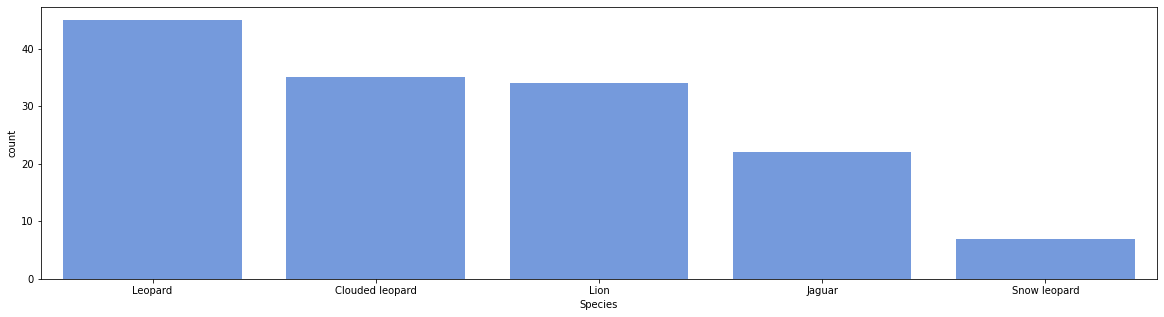

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(x='Species', data=df,order = df['Species'].value_counts().index, color='cornflowerblue')
plt.xticks()
plt.show()

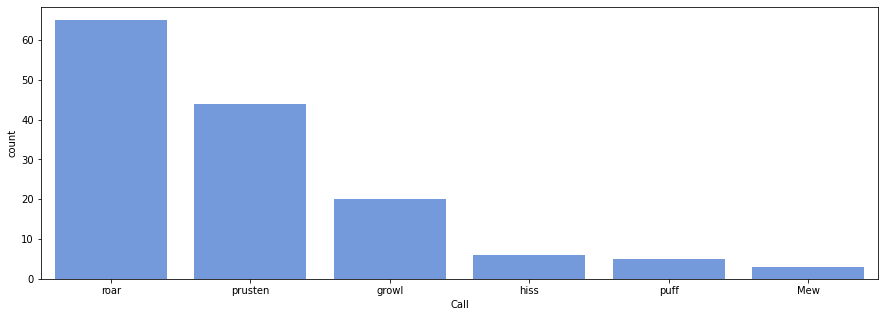

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(x='Call', data=df, order = df['Call'].value_counts().index, color='cornflowerblue')
plt.xticks()
plt.show()

<AxesSubplot:>

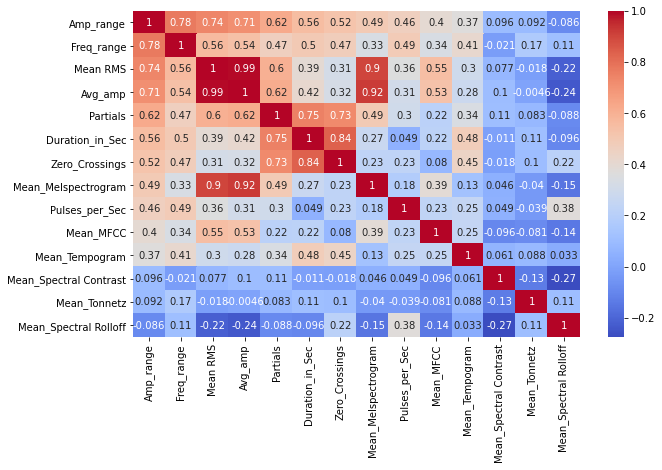

In [21]:
#Quality correlation matrix
k = 14 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Amp_range')['Amp_range'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'coolwarm')

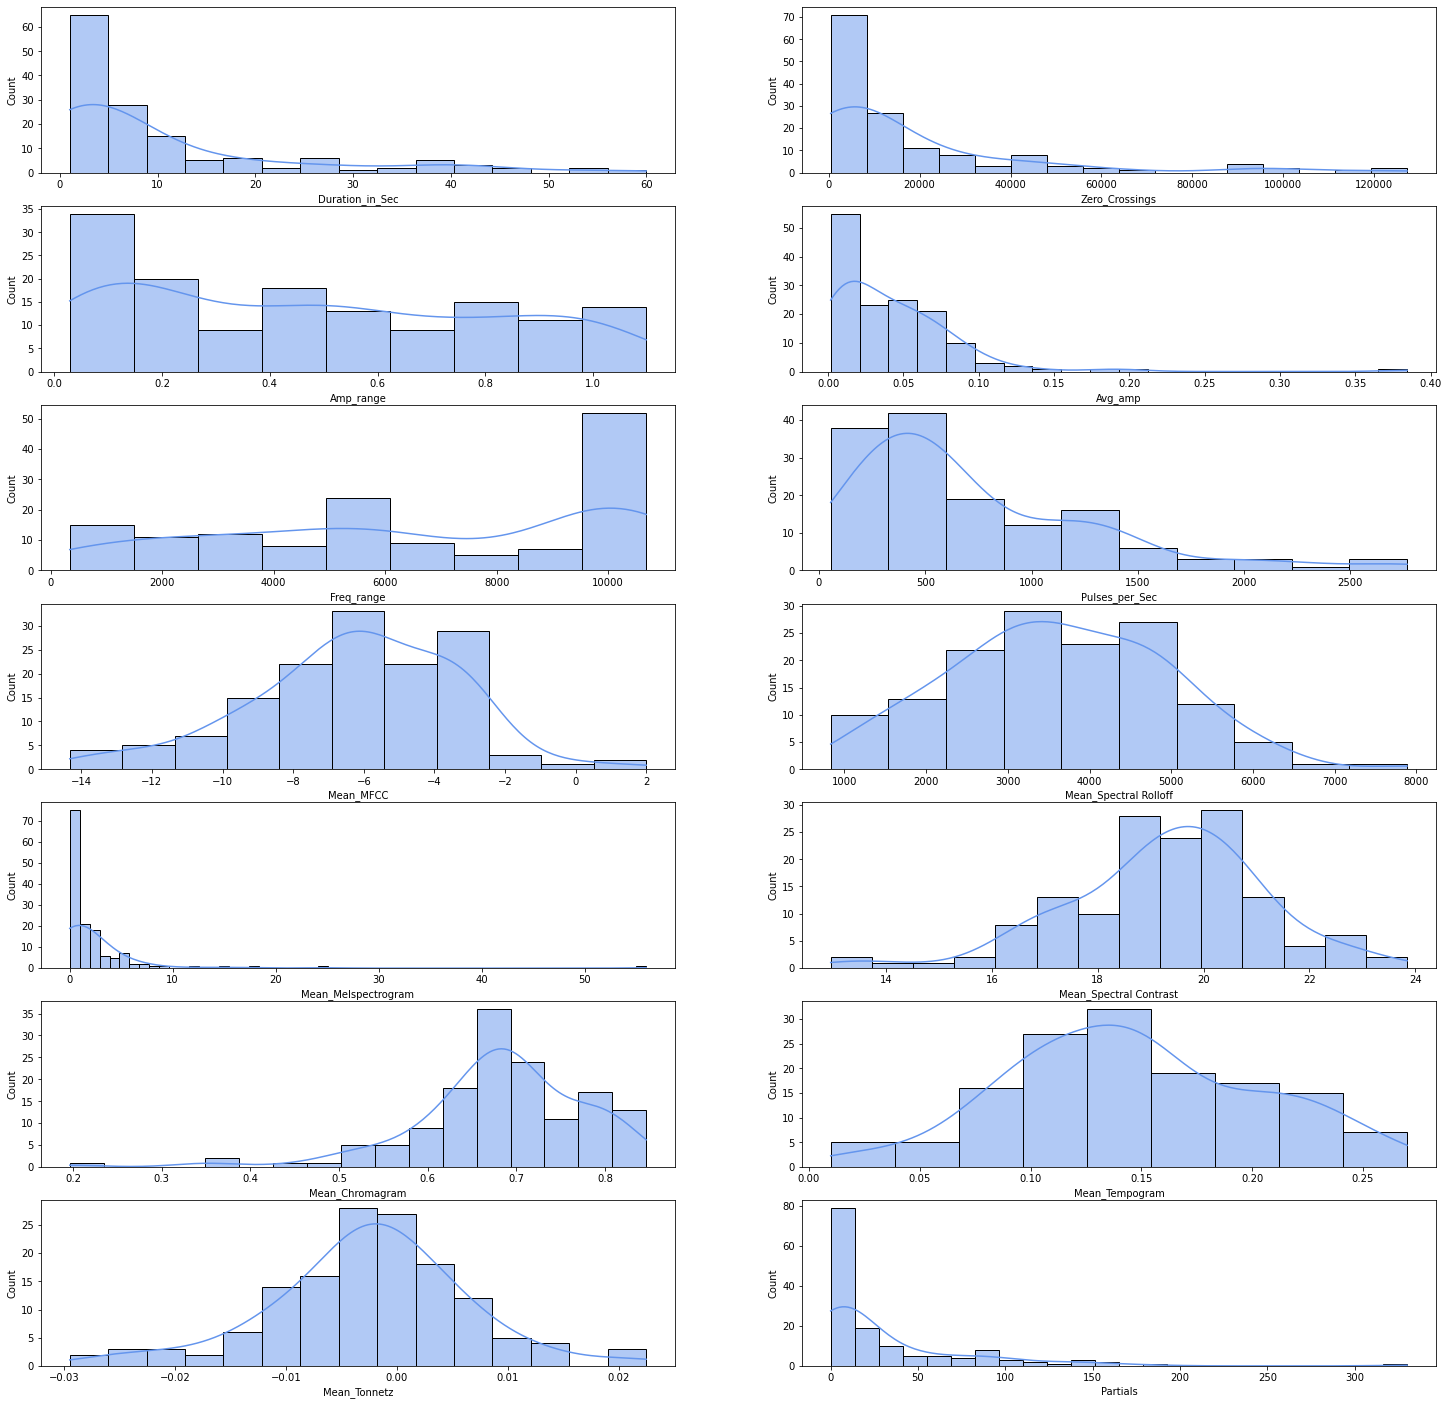

In [22]:
#Histogram to check distribution and skewness
l= ['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials']

plt.figure(figsize=(25,25))
for i in range(len(l)):
    plt.subplot(7,2,i+1)
    sns.histplot(df[l[i]],kde=True,color='cornflowerblue') 
plt.show()

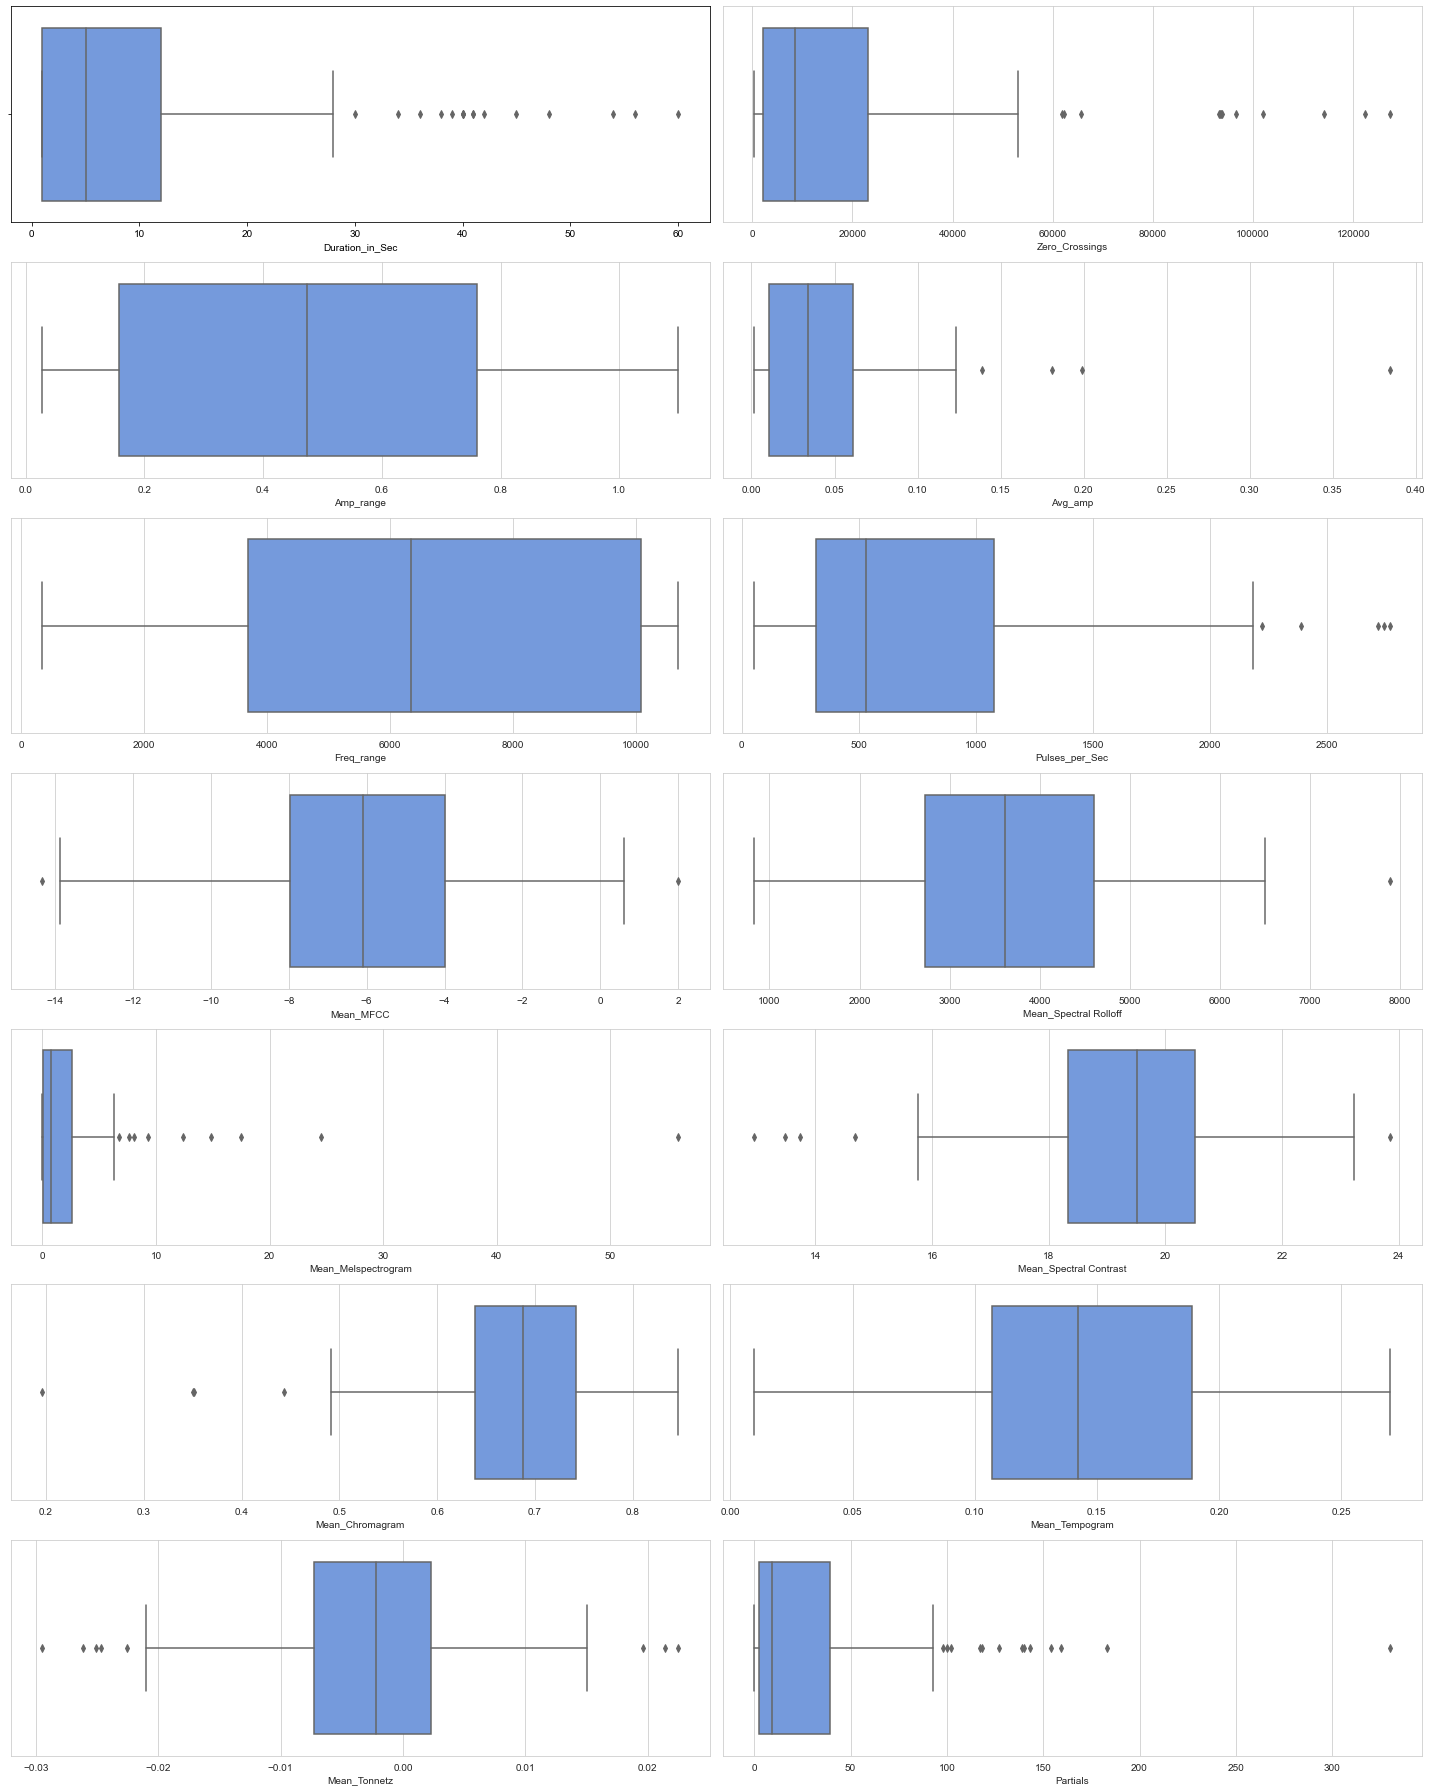

In [23]:
#Boxplot to check for outliers
l= ['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials']

plt.figure(figsize=(20,25))

for i in range(0,len(l)):
    plt.subplot(7,2,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='cornflowerblue',orient='h')
    plt.tight_layout()
plt.show()    

In [24]:
#Save new clean data to new CSV
df.to_csv('features_cleaned_not_standardized.csv', index=False)

## Standardize Continuous Features

In [28]:
import re

df_1 = df[df.Source.isin(['YouTube'])]

df_2 = df[df.Source.isin(['Museum f�r Naturkunde'])]

df_3 = df[df.Source.isin(['wildside sabrina tiktok'])]

df_4 = df[df.Source.isin(['Panther Ridge Conservation Center'])]

df_5 = df[df.Source.isin(['Wild Cat Conservation Center'])]

df_6 = df[df.Source.isna()]
         
#(['Youtube','Museum f�r Naturkunde','wildside sabrina tiktok', 'Panther Ridge Conservation Center','Wild Cat Conservation Center'])]

In [29]:
continuous = ['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials', 'Mean RMS']

scaler = StandardScaler()

for var in continuous:
    df_1[var] = df_1[var].astype('float64')
    df_1[var] = scaler.fit_transform(df_1[var].values.reshape(-1, 1))


In [30]:
for var in continuous:
    df_2[var] = df_2[var].astype('float64')
    df_2[var] = scaler.fit_transform(df_2[var].values.reshape(-1, 1))

for var in continuous:
    df_3[var] = df_3[var].astype('float64')
    df_3[var] = scaler.fit_transform(df_3[var].values.reshape(-1, 1))
    
for var in continuous:
    df_4[var] = df_4[var].astype('float64')
    df_4[var] = scaler.fit_transform(df_4[var].values.reshape(-1, 1))
    
for var in continuous:
    df_5[var] = df_5[var].astype('float64')
    df_5[var] = scaler.fit_transform(df_5[var].values.reshape(-1, 1))
    
for var in continuous:
    df_6[var] = df_6[var].astype('float64')
    df_6[var] = scaler.fit_transform(df_6[var].values.reshape(-1, 1))

In [31]:
df.describe(include='float64')

,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,Mean_Melspectrogram,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Mean RMS
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.473706,0.043030,6535.450124,733.323111,-6.250280,3629.312818,2.366345,19.273353,0.681821,0.146602,-0.002561,0.056034
std,0.336793,0.045686,3431.538918,581.775669,2.938998,1325.609110,5.602144,1.876151,0.098751,0.056773,0.008978,0.057640
min,0.028533,0.001734,345.000000,54.666667,-14.324327,832.920861,0.001152,12.954071,0.196460,0.009798,-0.029482,0.002313
25%,0.157780,0.010367,3694.964286,318.930357,-7.970505,2727.665540,0.064521,18.332792,0.638936,0.107239,-0.007237,0.013793
50%,0.473299,0.034064,6346.000000,532.000000,-6.099451,3613.418302,0.793374,19.514204,0.687343,0.142212,-0.002209,0.044117
75%,0.759965,0.060890,10072.368056,1075.143804,-3.995342,4598.605606,2.623368,20.499962,0.741507,0.188739,0.002309,0.085491
max,1.098874,0.384435,10681.044444,2766.714286,1.995642,7885.786974,55.972710,23.847936,0.846237,0.269959,0.022494,0.475639


In [32]:
frames = [df_1, df_2, df_3, df_4, df_5, df_6]

df = pd.concat(frames)

df

,File Name,Source,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,...,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS,Sex,Age,Species,Call
35,Jaguar-Prusten-1,YouTube,-0.886060,-0.769406,0.059570,-0.281491,-0.323300,0.893591,1.634774,0.609362,...,-0.663664,1.314330,-0.913667,-0.329467,-0.505398,-0.289135,Unknown,Unknown,Jaguar,prusten
36,Jaguar-Prusten-1,YouTube,-0.886060,-0.705032,-1.678013,-1.035294,-0.685931,-0.099558,-0.949633,1.739482,...,-1.144383,1.307833,-0.726898,-1.144173,-0.784713,-1.074775,Unknown,Unknown,Jaguar,prusten
37,Jaguar-Prusten-1,YouTube,-0.886060,-0.770326,-1.844081,-1.066887,-2.365467,-1.044900,-0.510765,1.371723,...,-1.445473,1.669668,-0.479114,-0.489322,-0.803334,-1.110032,Unknown,Unknown,Jaguar,prusten
38,Jaguar-Prusten-1,YouTube,-0.886060,-0.774429,-1.690616,-0.983828,-2.382128,-1.063406,0.012620,0.895415,...,-1.052163,0.981955,-0.815647,-1.161936,-0.803334,-1.025160,Unknown,Unknown,Jaguar,prusten
39,Jaguar-Prusten-1,YouTube,-0.886060,-0.801873,-1.642058,-0.879312,-0.737875,-0.468133,1.125727,0.842231,...,-0.862449,0.942801,-0.973142,1.183957,-0.803334,-0.928300,Unknown,Unknown,Jaguar,prusten
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Snow Leopard Mew 1,NaN,0.902671,0.717177,0.975744,1.177608,1.103918,0.240912,-0.318395,-1.140843,...,1.356603,-1.540563,1.139624,0.995818,0.738179,1.169363,Unknown,Unknown,Snow leopard,Mew
105,Snow Leopard Prusten_1,NaN,-0.820610,-0.922977,-0.330372,-0.234358,-0.367184,0.955595,2.127712,-0.326837,...,1.269603,0.330863,-0.787992,-2.240807,-0.660691,-0.230673,Unknown,Unknown,Snow leopard,prusten
106,Snow Leopard Prusten_2,NaN,-0.820610,-0.740076,-0.962303,-0.966192,-0.616071,0.136892,-0.524594,1.404542,...,-0.003547,1.001841,-1.253511,0.411657,-0.889078,-0.964313,Unknown,Unknown,Snow leopard,prusten
107,Snow Leopard Prusten_2,NaN,-0.820610,-0.746980,-1.032937,-1.029990,-1.411419,-1.431687,-0.679099,1.227809,...,0.294294,1.112512,-0.181128,0.073450,-0.889078,-1.033277,Unknown,Unknown,Snow leopard,prusten


In [33]:
#Save new clean data to new CSV
df.to_csv('features_cleaned.csv', index=False)